# Project Predictive Analytics

#### Author : 
2010512062 - Nicodemus Naisau (demsroadmap@gmail.com) <br>
2010512141 - Syauqi Khosyi Hidayat (syauqikhosyi@gmail.com) 


<img src="https://www.mdanderson.org/images/publications/cancerwise/D/CW-diabetes-iStock-1168613048.jpg"
     alt="ecommerce img assets"
     style="float: center" />

___

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

#balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#lazypredict
from lazypredict.Supervised import LazyClassifier

#import warnings
import warnings
warnings.filterwarnings("ignore") 

___

# Columns Exploration

## Load The Dataset

In [2]:
df = pd.read_csv("diabetes.csv")

## Checking The First 5 Rows of Dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


## Statistic Summary

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


# Columns

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

There's 9 columns:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

## Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terlihat bahwa kolom `BMI` serta kolom `DiabetesPedigreeFunction` bertipe data float, selebihnya menggunakan tipe data integer. Setiap kolom yang ada pada himpunan data `diabetes.csv` tercatat tidak memiliki data yang tidak kosong.

## Explanation For Each Columns

Explanation of columns in this dataset:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Description: 
- If the `Outcome` column value is 0, patient don’t suffer from diabetes
- If the `Outcome` column value is 1, patient don’t suffer from diabetes

___

# Data Preparation

## Checking The Missing Value

In [7]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    #changing outliers value into std
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

def skewed_based (col_name,df):
    #quartile3 define
    q3 = df[col_name].quantile(q=0.75) * 1.5
    #changing outliers value into median
    df.loc[df[col_name] > q3, col_name]= median
    
def mean_based(col_name, df):
    #quartile3 define
    q3 = df[col_name].quantile(q=0.75) * 1.5
    q1 = df[col_name].quantile(q=0.25) * 1.5
    mean = df[col_name].mean()
    #changing outliers value into mean
    df.loc[(df[col_name] > q3), col_name] = mean

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Checking The Duplicate Data

In [9]:
duplicate = df[df.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


After checking dataset, does not find duplicate values.

## Checking Anomaly Data Or Outlier

In [10]:
for i in df.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


### Pregnancies

In [11]:
df['Pregnancies'].describe()

count   768.00
mean      3.85
std       3.37
min       0.00
25%       1.00
50%       3.00
75%       6.00
max      17.00
Name: Pregnancies, dtype: float64

We look at the distribution and boxplot

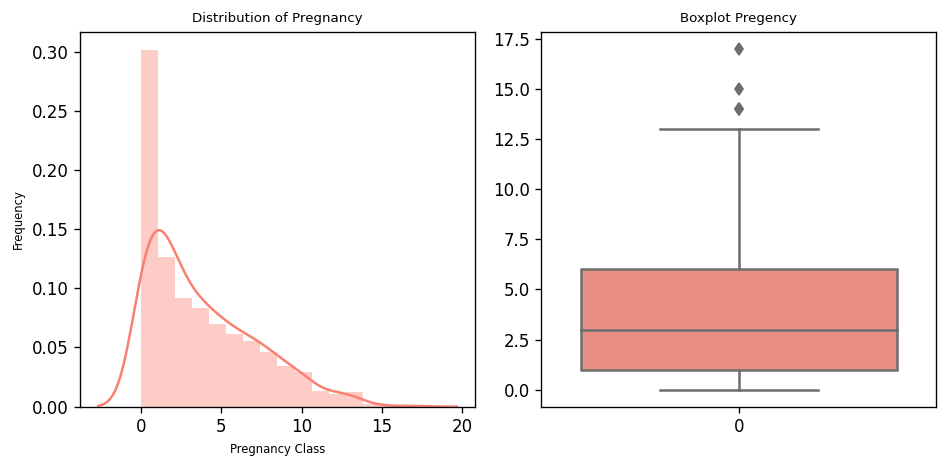

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Pregnancies'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Pregency',fontdict={'fontsize':8})
plt.tight_layout()

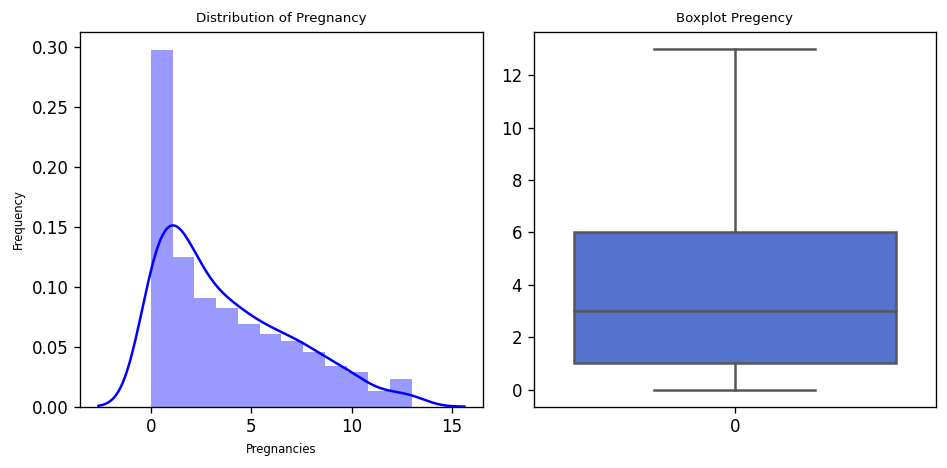

In [13]:
#Treating Outlier and then verifying it

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot(data = df['Pregnancies'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Pregency',fontdict={'fontsize':8})
plt.tight_layout()

### Glucose

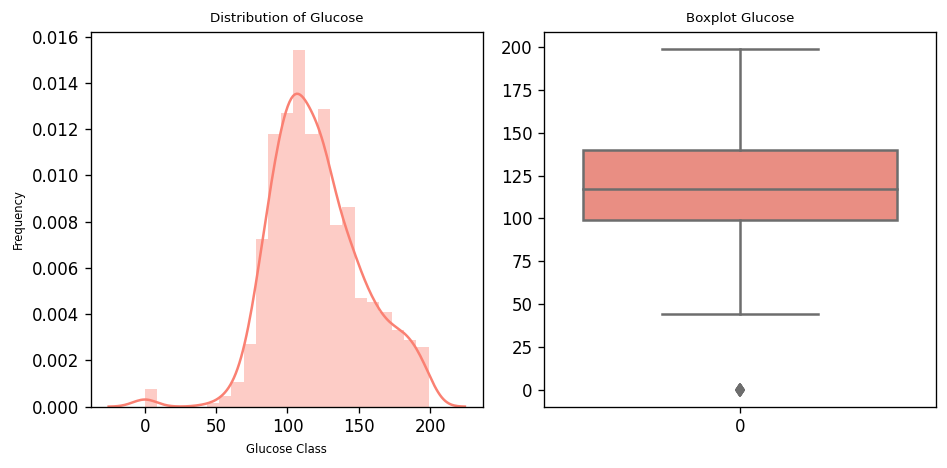

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Glucose'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Glucose',fontdict={'fontsize':8})
plt.tight_layout()

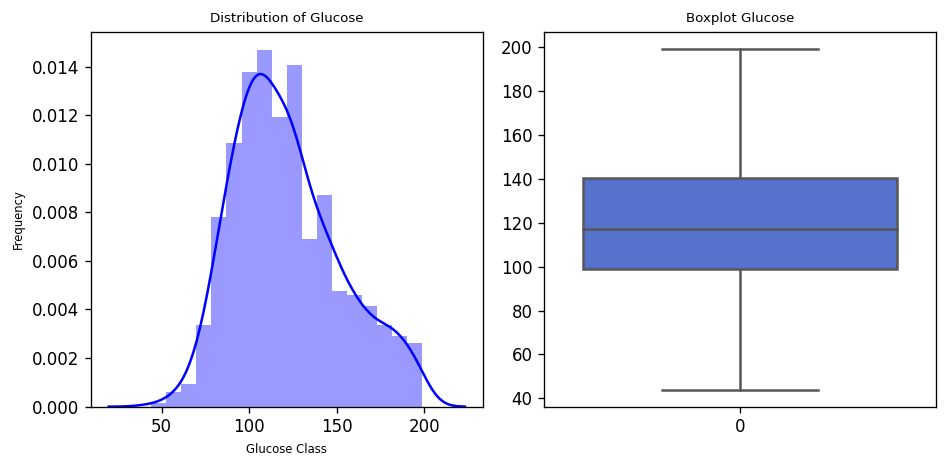

In [15]:
df = std_based("Glucose",df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Glucose'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Glucose',fontdict={'fontsize':8})
plt.tight_layout()

### BloodPressure

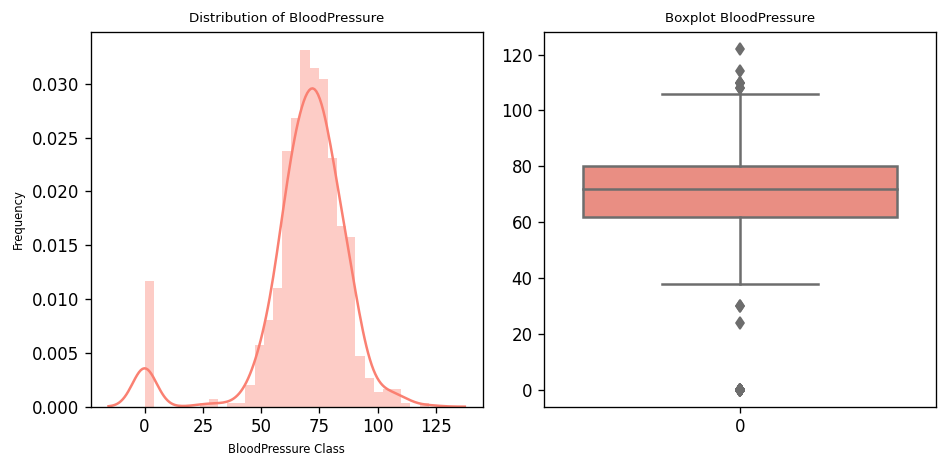

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BloodPressure'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

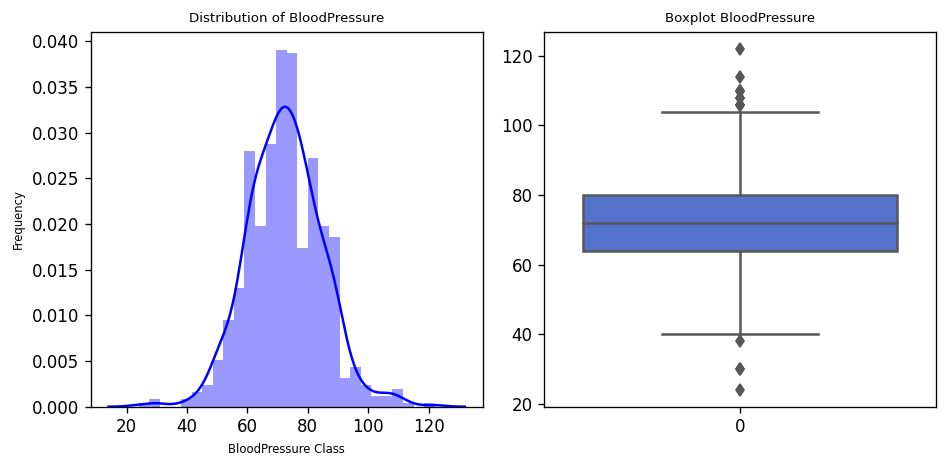

In [17]:
df = std_based('BloodPressure',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BloodPressure'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

### SkinThickness

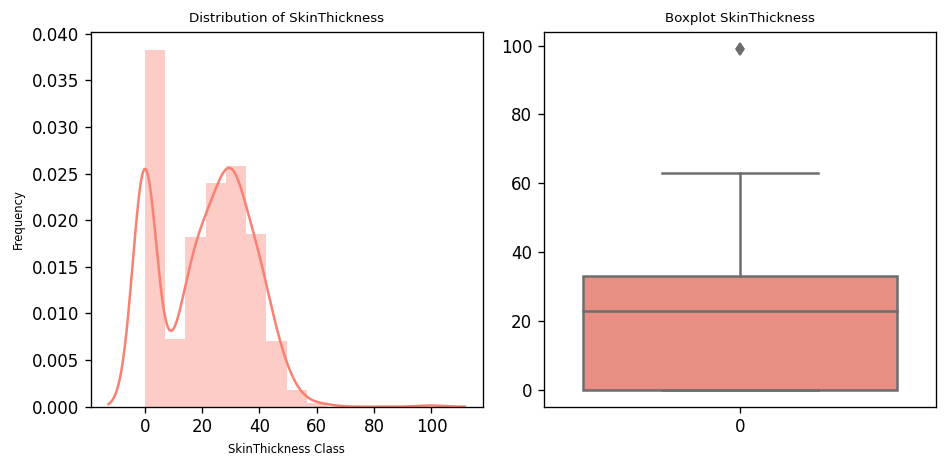

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

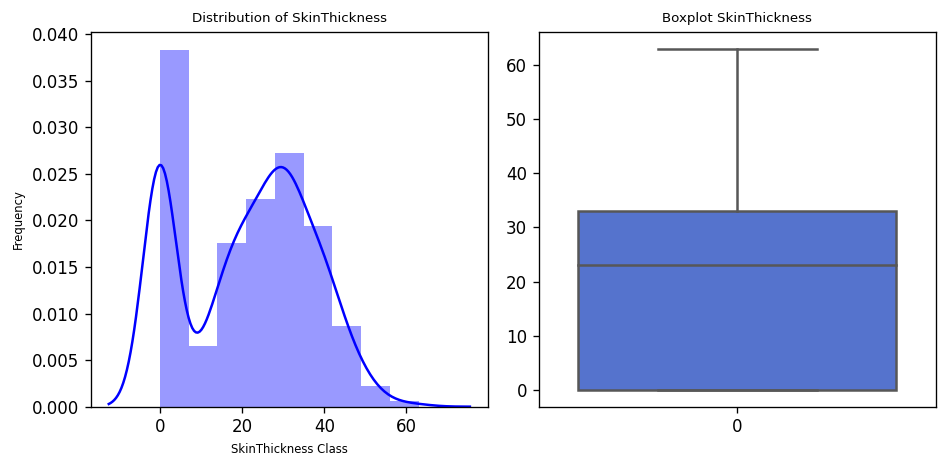

In [19]:
df = std_based('SkinThickness',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

### Insulin

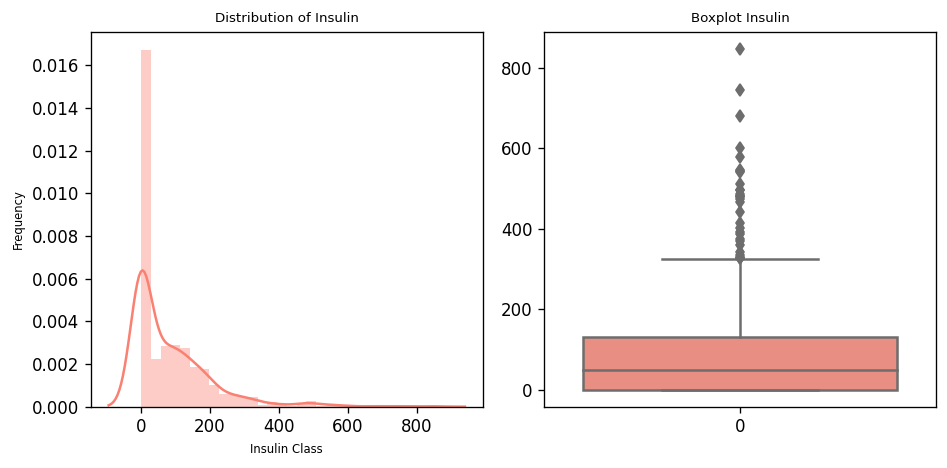

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Insulin'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Insulin',fontdict={'fontsize':8})
plt.tight_layout()

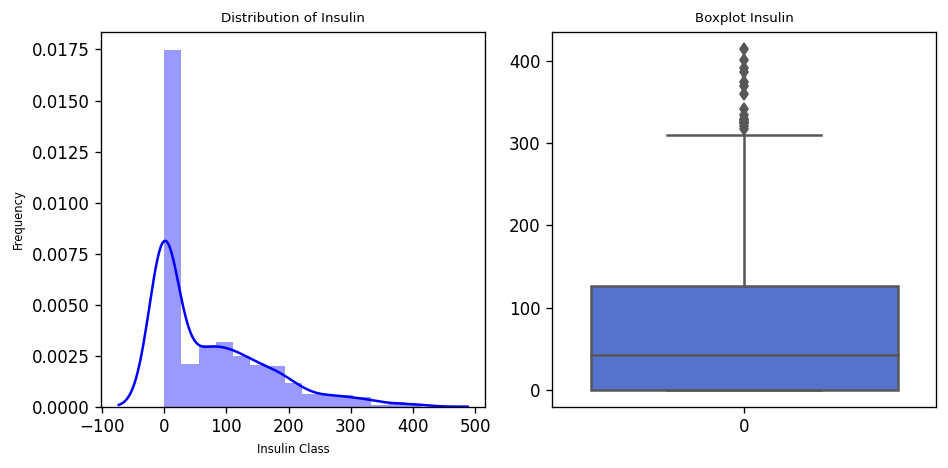

In [21]:
df = std_based('Insulin',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Insulin'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Insulin',fontdict={'fontsize':8})
plt.tight_layout()

### BMI

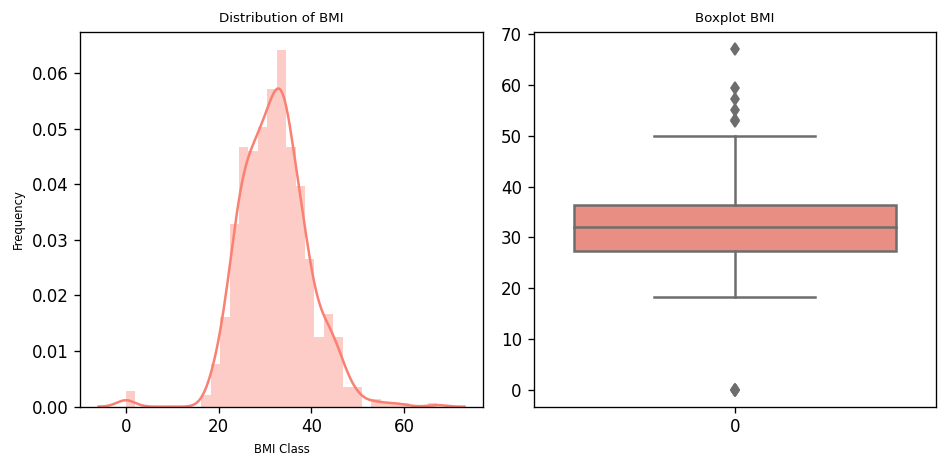

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BMI'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot BMI',fontdict={'fontsize':8})
plt.tight_layout()

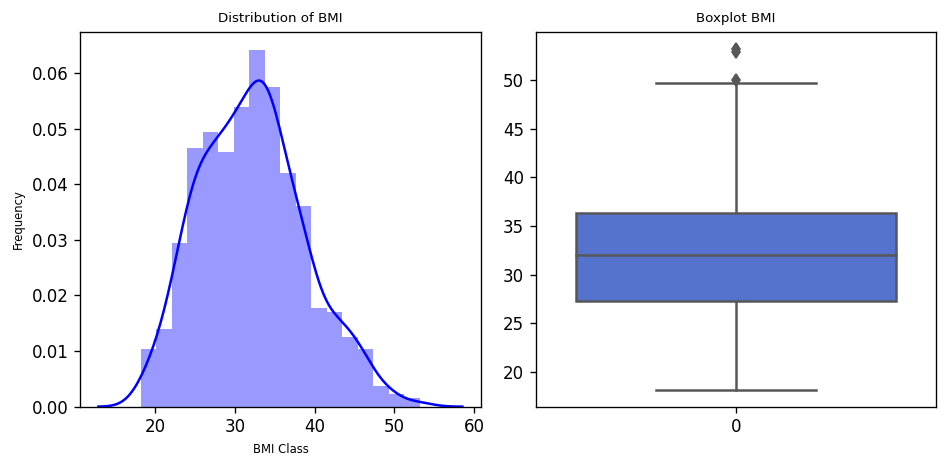

In [23]:
df = std_based('BMI',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BMI'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot BMI',fontdict={'fontsize':8})
plt.tight_layout()

### DiabetesPedigreeFunction

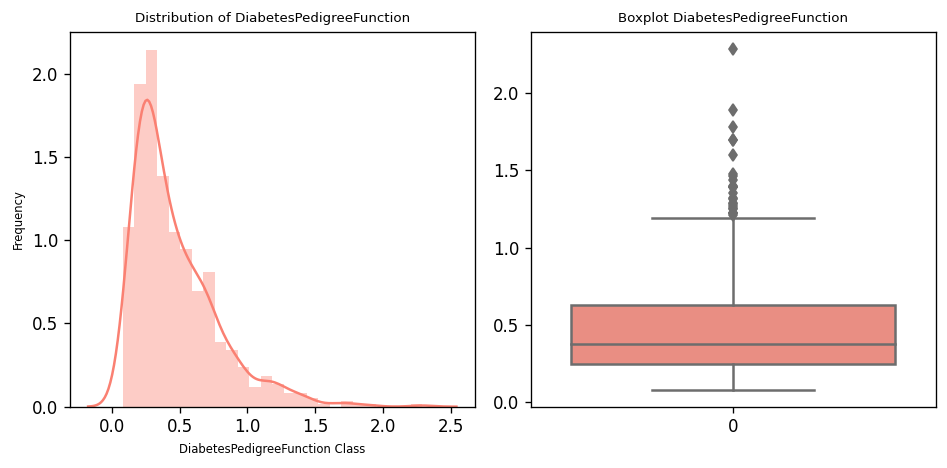

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['DiabetesPedigreeFunction'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot DiabetesPedigreeFunction',fontdict={'fontsize':8})
plt.tight_layout()

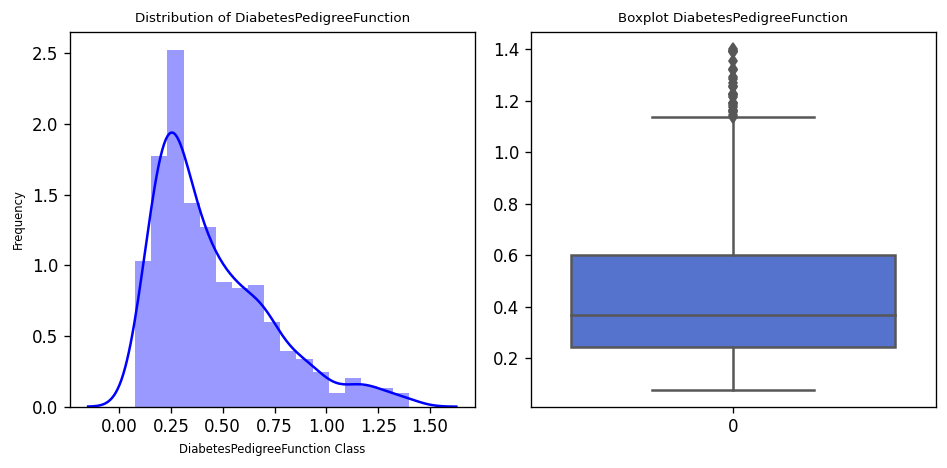

In [25]:
df = std_based('DiabetesPedigreeFunction',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['DiabetesPedigreeFunction'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot DiabetesPedigreeFunction',fontdict={'fontsize':8})
plt.tight_layout()

### Age

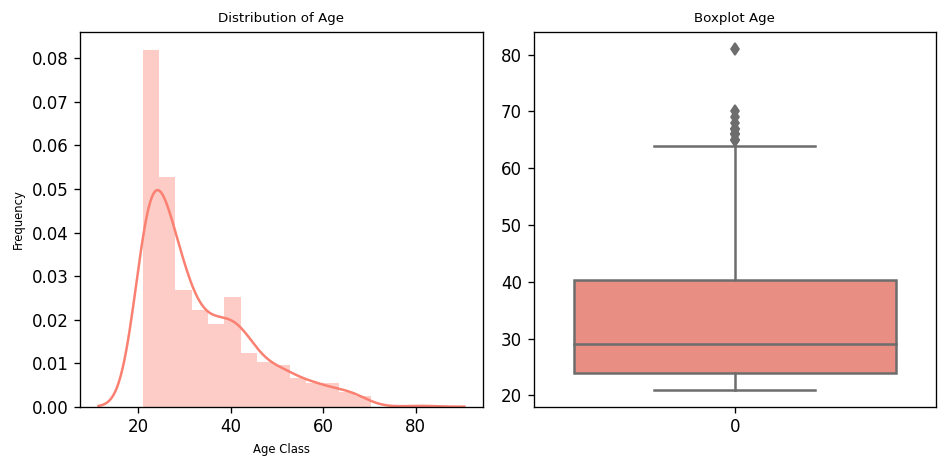

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Age'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Age',fontdict={'fontsize':8})
plt.tight_layout()

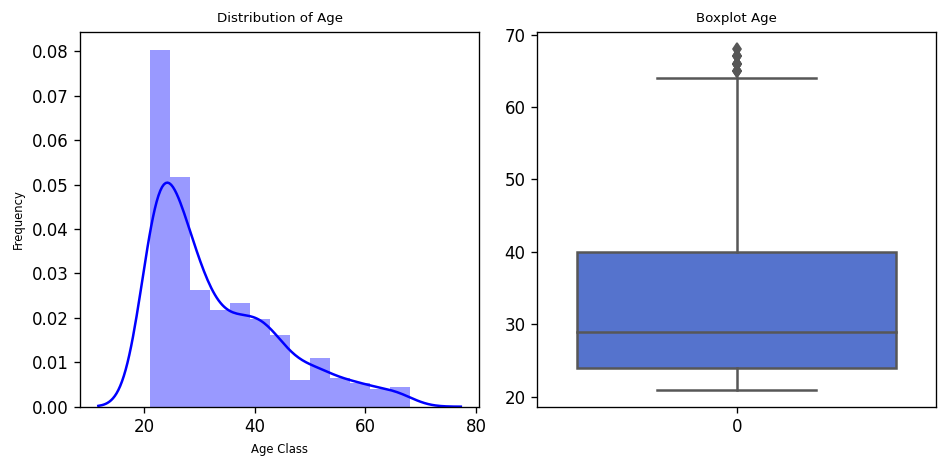

In [27]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Age'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Age',fontdict={'fontsize':8})
plt.tight_layout()

___

# Exploratory Data Analysis (EDA)

## Univariate Analysis

**Given the pathology of Diabetes the primal assumption is that the following factors might forecast the outcome**

Glucose level in a glucose tolerance test (Higher the glucose higher the chance of diabetes) <br>
BMI (Higher the BMI higher the chance of diabetes) <br>
Diabetes family history (Higher the family incidence higher the chance of diabetes) <br>

In [28]:
#adding Mapping Replace
df['Label'] = df['Outcome'].map(lambda r: {0: 'NonDiabetes', 1: 'Diabetes'}[r])

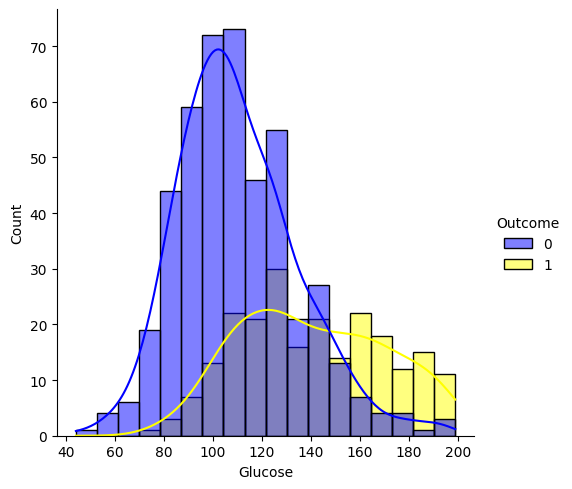

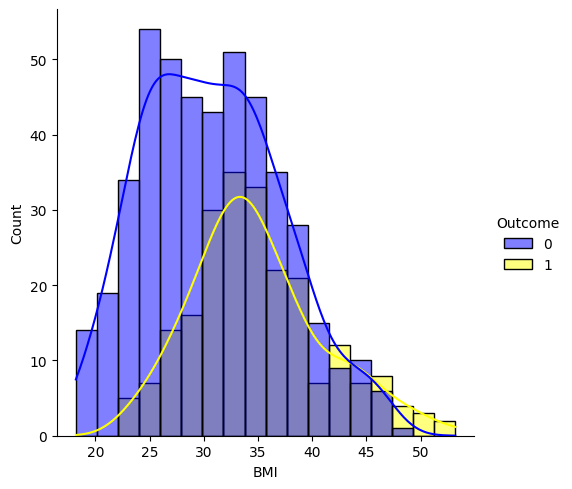

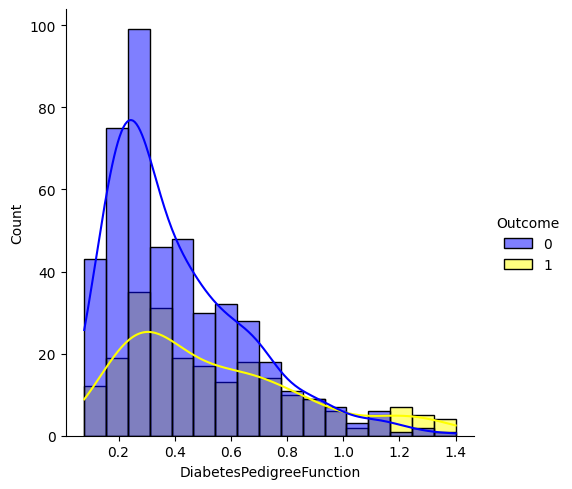

In [29]:
num_cols = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
palette = {0: 'blue', 1: 'yellow'}
for i in num_cols:
    sns.displot(data = df, kde=True, x = df[str(i)], hue='Outcome', palette = palette)
    plt.show()

Glucose level - outcome 0: normal distribution | outcome 1: bimodal distribution with a global maximum at 130 and a local max at 160 mmol/L <br>

BMI - outcome 0: normal distribution | outcome 1: binomial distribution<br>

Diabetes family history - outcome 0: normal distribution, positive skewed | outcome 1: binomial distribution, positive skewed

## Correlation Each Attribute

Text(0.5, 1.0, 'Correlation between features')

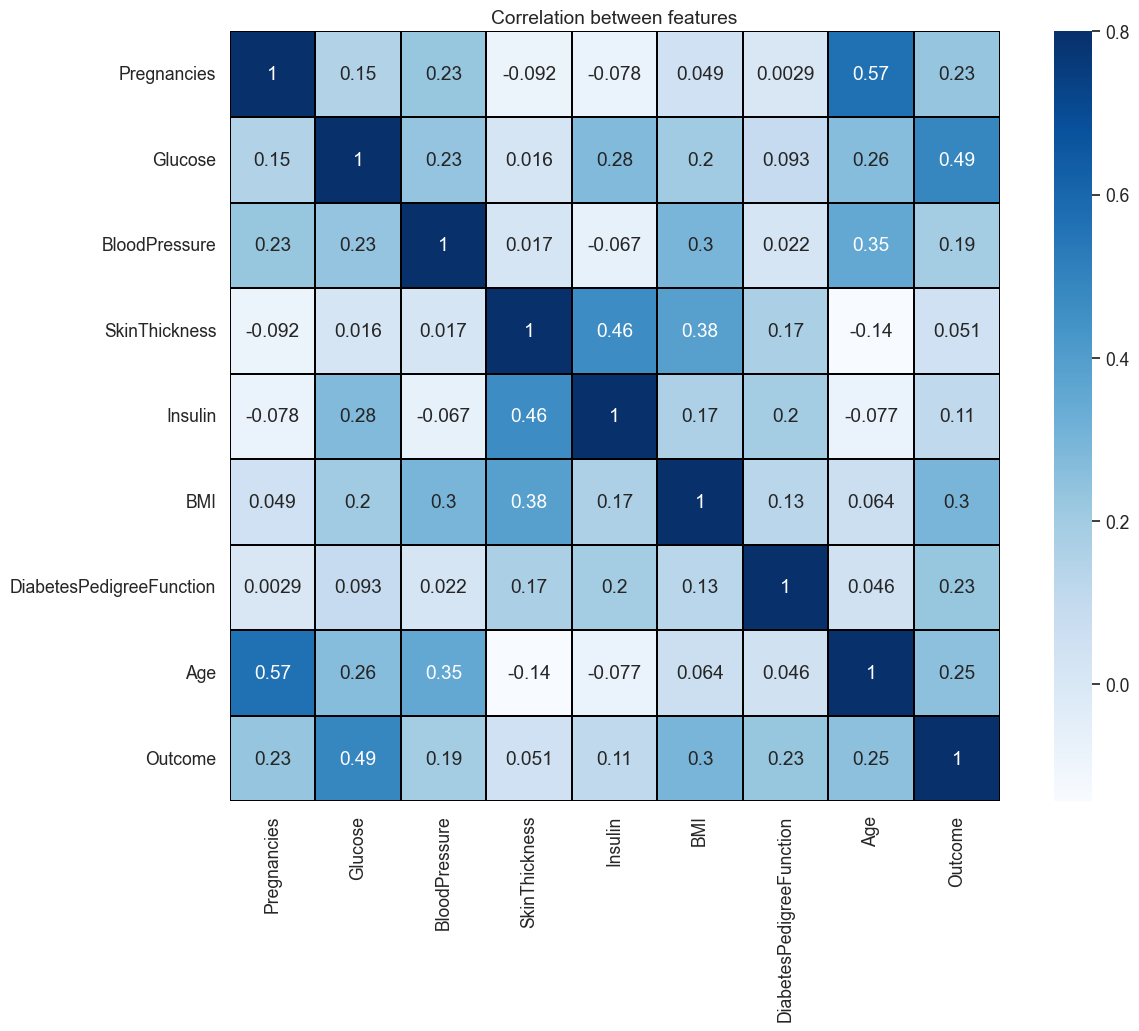

In [30]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="black")
plt.title('Correlation between features')

In [31]:
# draw a correlation matrix to see what features are corralating to the outcome the most:
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
correlation.style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.23,0.49,0.19,0.05,0.11,0.30,0.23,0.25,1.00
Glucose,0.15,1.00,0.23,0.02,0.28,0.20,0.09,0.26,0.49
BMI,0.05,0.20,0.30,0.38,0.17,1.00,0.13,0.06,0.30
Age,0.57,0.26,0.35,-0.14,-0.08,0.06,0.05,1.00,0.25
Pregnancies,1.00,0.15,0.23,-0.09,-0.08,0.05,0.00,0.57,0.23
DiabetesPedigreeFunction,0.00,0.09,0.02,0.17,0.20,0.13,1.00,0.05,0.23
BloodPressure,0.23,0.23,1.00,0.02,-0.07,0.30,0.02,0.35,0.19
Insulin,-0.08,0.28,-0.07,0.46,1.00,0.17,0.20,-0.08,0.11
SkinThickness,-0.09,0.02,0.02,1.00,0.46,0.38,0.17,-0.14,0.05


,Outcome
Outcome,1.000000
Glucose,0.486779
BMI,0.295154
Age,0.252399
Pregnancies,0.232071
DiabetesPedigreeFunction,0.225279
BloodPressure,0.194683
Insulin,0.108156
SkinThickness,0.051373


Text(0.5, 1.0, 'Correlation matrix based on Outcome')

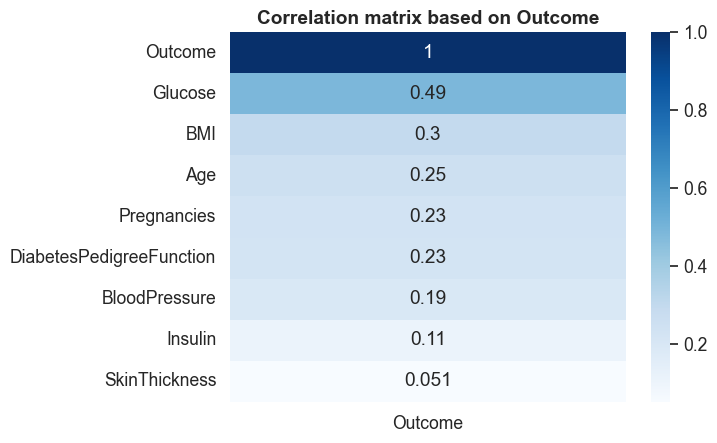

In [32]:
ax = sns.heatmap(correlation, annot=True, cmap='Blues')
ax.set_title(
        "Correlation matrix based on Outcome",
        fontdict={"fontweight": "bold"},
    )

## Proportional

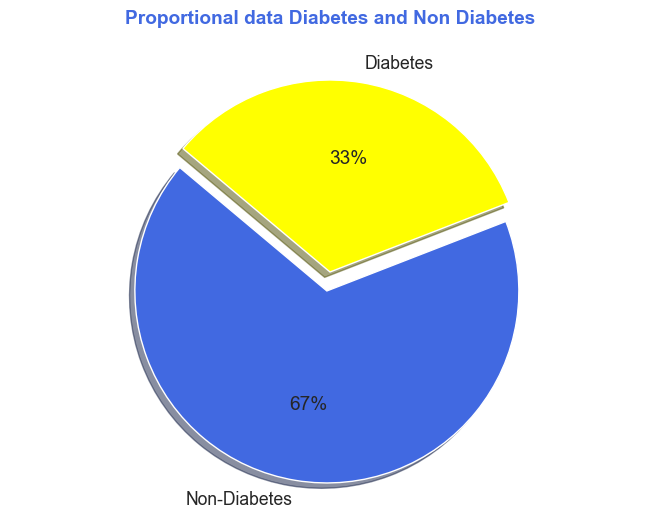

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non-Diabetes','Diabetes']
diabetes_count = df.Outcome.value_counts()
ax.set_title(
        "Proportional data Diabetes and Non Diabetes",
        fontdict={"fontweight": "bold"},
    color='royalblue'
    )
explode = (0.1, 0)
colors = ['royalblue','yellow']
ax.pie(diabetes_count,  labels=labels, autopct='%.0f%%', shadow=True, startangle=140, explode=explode,colors=colors)
plt.show()

___

# Data Preprocessing

### StandardScaler

In [34]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label
0,6,0.93,72,35,0,0.22,0.63,50,1,Diabetes
1,1,-1.18,66,29,0,-0.85,-0.36,31,0,NonDiabetes
2,8,2.10,64,0,0,-1.35,0.79,32,1,Diabetes
3,1,-1.04,66,23,94,-0.62,-1.02,21,0,NonDiabetes
5,5,-0.14,74,0,0,-1.00,-0.90,30,0,NonDiabetes
...,...,...,...,...,...,...,...,...,...,...
763,10,-0.64,76,48,180,0.11,-1.00,63,0,NonDiabetes
764,2,0.06,70,27,0,0.71,-0.40,27,0,NonDiabetes
765,5,0.03,72,23,112,-0.91,-0.74,30,0,NonDiabetes
766,1,0.19,60,0,0,-0.32,-0.37,47,1,Diabetes


## Spliting The Dataset

In [35]:
# Splitting Data

# Predictor (X) and target (y)
X = df.drop(['Outcome', 'Label'], axis=1)# Testing
y = df['Outcome']

#  Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___

# Machine Learning Modelling

### Decision Tree

In [36]:
dec_model = DecisionTreeClassifier().fit(x_train, y_train)

# Training
y_train_pred = dec_model.predict(x_train)

# Test
y_test_pred = dec_model.predict(x_test)

### Training Confusion Matrix (Decision Tree)

In [37]:
# Form confusion matrix as a DataFrame
confusion_matrix_trainig_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

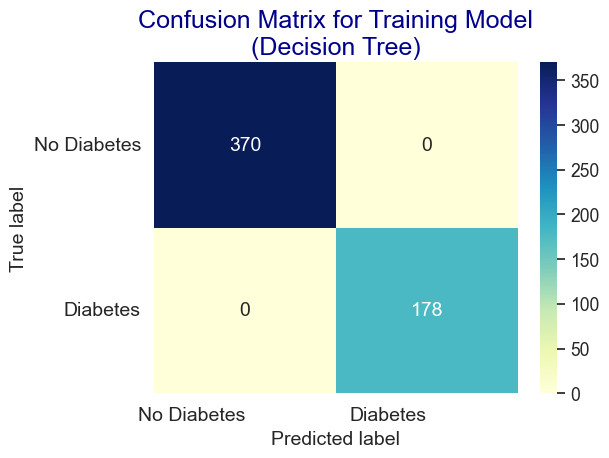

In [38]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_trainig_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
# Print classification report
print('Classification Report Training Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score Decision Tree : {accuracy_score(y_train, y_train_pred)}')

Classification Report Training Model (Decision Tree) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       178

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548

Accuracy Test Score Decision Tree : 1.0


### Testing Confusion Matrix (Decision Tree)

In [40]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

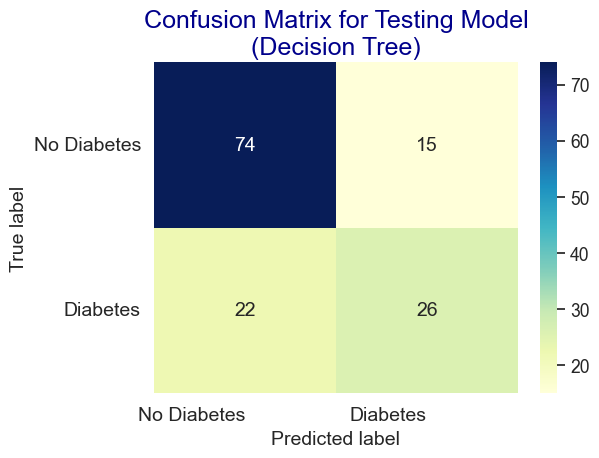

In [41]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [42]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Decision Tree : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        89
           1       0.63      0.54      0.58        48

    accuracy                           0.73       137
   macro avg       0.70      0.69      0.69       137
weighted avg       0.72      0.73      0.72       137

Accuracy Test Score Decision Tree : 0.7299270072992701


### XGBoost

In [43]:
xgb_model = XGBClassifier().fit(x_train, y_train)

# Training
y_train_pred = xgb_model.predict(x_train)

# Test
y_test_pred= xgb_model.predict(x_test)

### Training Confusion Matrix (XGB)

In [44]:
# Form confusion matrix as a DataFrame
confusion_matrix_training_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

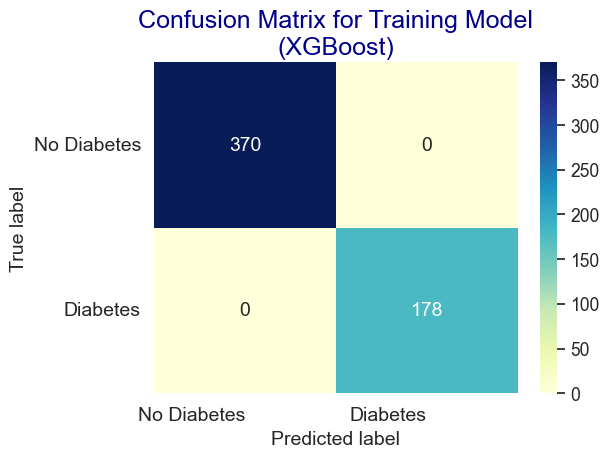

In [45]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_train, y_train_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       178

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548

Accuracy Test Score XGB : 1.0


### Testing Confusion Matrix (XGB)

In [47]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

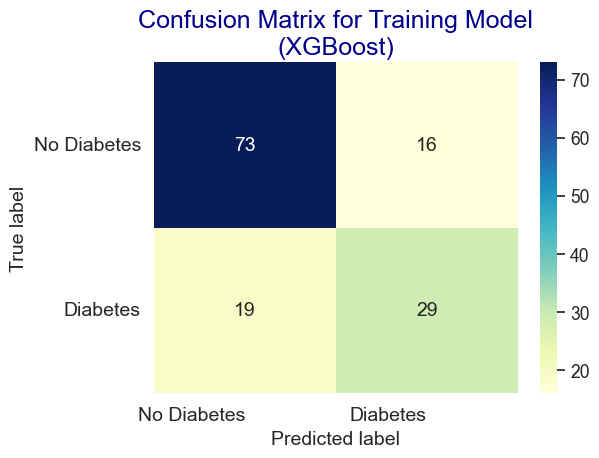

In [48]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        89
           1       0.64      0.60      0.62        48

    accuracy                           0.74       137
   macro avg       0.72      0.71      0.72       137
weighted avg       0.74      0.74      0.74       137

Accuracy Test Score XGB : 0.7445255474452555


### LogisticRegression

In [50]:
log_model = LogisticRegression().fit(x_train, y_train)

# Training
y_train_pred = log_model.predict(x_train)

# Test
y_test_pred= log_model.predict(x_test)

### Training Confusion Matrix (LogisticRegression)

In [51]:
# Form confusion matrix as a DataFrame
confusion_matrix_training_lr= pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

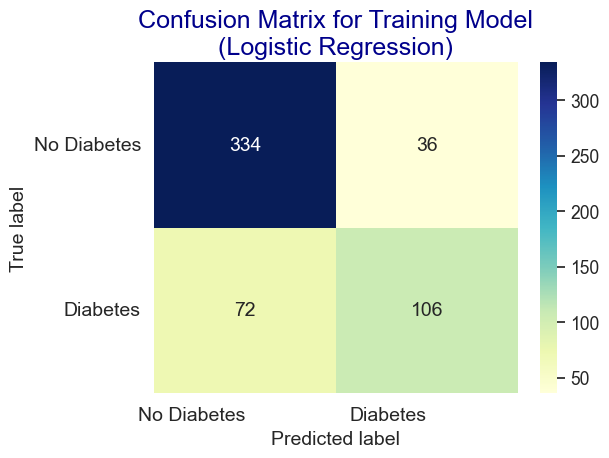

In [52]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [53]:
# Print classification report
print('Classification Report Training Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Train Score Logistic Regression :{accuracy_score(y_train, y_train_pred)}')

Classification Report Training Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       370
           1       0.75      0.60      0.66       178

    accuracy                           0.80       548
   macro avg       0.78      0.75      0.76       548
weighted avg       0.80      0.80      0.80       548

Accuracy Train Score Logistic Regression :0.8029197080291971


### Test Confusion Matrix (LogisticRegression)

In [54]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

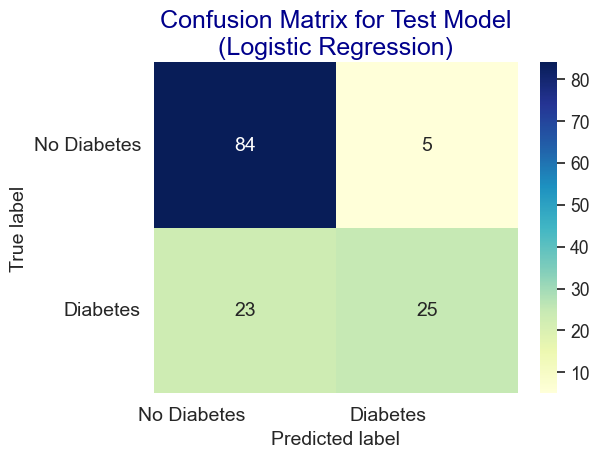

In [55]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Test Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Logistic Regression : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        89
           1       0.83      0.52      0.64        48

    accuracy                           0.80       137
   macro avg       0.81      0.73      0.75       137
weighted avg       0.80      0.80      0.78       137

Accuracy Test Score Logistic Regression : 0.7956204379562044


## LazyPredict

In [57]:
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models.style.background_gradient(cmap='Blues')

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.02it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.802920,0.761938,0.761938,0.797468,0.024452
BaggingClassifier,0.788321,0.741105,0.741105,0.780784,0.111329
ExtraTreesClassifier,0.773723,0.734668,0.734668,0.769105,0.357299
NuSVC,0.788321,0.731507,0.731507,0.776947,0.045876
SVC,0.788321,0.731507,0.731507,0.776947,0.077792
LabelSpreading,0.759124,0.728230,0.728230,0.757235,0.057847
LabelPropagation,0.759124,0.728230,0.728230,0.757235,0.036900
LogisticRegression,0.788321,0.726709,0.726709,0.774773,0.026929
LinearDiscriminantAnalysis,0.788321,0.726709,0.726709,0.774773,0.046874


____

# K-Fold Cross Validation

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"
     alt="ecommerce img assets"
     style="float: center" />

In [59]:
# Create an instance of Pipeline

pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier().fit(x_train, y_train))

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores_DT = []
k_range = list(range(1, 11))

for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
    scores_DT.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores_DT), np.std(scores_DT)))

Fold:  1, Training/Test Split Distribution: [333 160], Accuracy: 0.745
Fold:  2, Training/Test Split Distribution: [333 160], Accuracy: 0.745
Fold:  3, Training/Test Split Distribution: [333 160], Accuracy: 0.691
Fold:  4, Training/Test Split Distribution: [333 160], Accuracy: 0.764
Fold:  5, Training/Test Split Distribution: [333 160], Accuracy: 0.673
Fold:  6, Training/Test Split Distribution: [333 160], Accuracy: 0.764
Fold:  7, Training/Test Split Distribution: [333 160], Accuracy: 0.655
Fold:  8, Training/Test Split Distribution: [333 160], Accuracy: 0.764
Fold:  9, Training/Test Split Distribution: [333 161], Accuracy: 0.704
Fold: 10, Training/Test Split Distribution: [333 161], Accuracy: 0.648


Cross-Validation accuracy: 0.715 +/- 0.044


Text(0.5, 1.0, 'DecisionTreeClassifier')

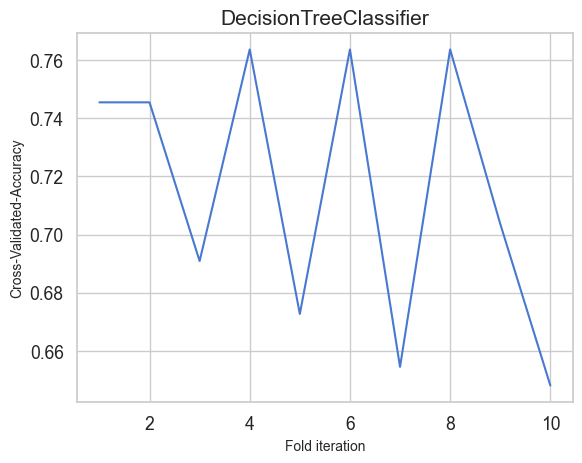

In [60]:
# set the seaborn style
sns.set_style("whitegrid")
# Color palette
blue, = sns.color_palette("muted", 1)

plt.plot(k_range, scores_DT, color=blue)
sns.set_style("whitegrid")
plt.xlabel('Fold iteration',fontdict={'fontsize':10})
plt.ylabel('Cross-Validated-Accuracy',fontdict={'fontsize':10})
plt.title('DecisionTreeClassifier',fontdict={'fontsize':15})

In [61]:
# Create an instance of Pipeline

pipeline = make_pipeline(StandardScaler(), XGBClassifier().fit(x_train, y_train))

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores_XGB = []
k_range = list(range(1, 11))

for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
    scores_XGB.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores_DT), np.std(scores_DT)))

Fold:  1, Training/Test Split Distribution: [333 160], Accuracy: 0.709
Fold:  2, Training/Test Split Distribution: [333 160], Accuracy: 0.727
Fold:  3, Training/Test Split Distribution: [333 160], Accuracy: 0.745
Fold:  4, Training/Test Split Distribution: [333 160], Accuracy: 0.673
Fold:  5, Training/Test Split Distribution: [333 160], Accuracy: 0.727
Fold:  6, Training/Test Split Distribution: [333 160], Accuracy: 0.745
Fold:  7, Training/Test Split Distribution: [333 160], Accuracy: 0.709
Fold:  8, Training/Test Split Distribution: [333 160], Accuracy: 0.800
Fold:  9, Training/Test Split Distribution: [333 161], Accuracy: 0.759
Fold: 10, Training/Test Split Distribution: [333 161], Accuracy: 0.704


Cross-Validation accuracy: 0.715 +/- 0.044


Text(0.5, 1.0, 'XGBoost')

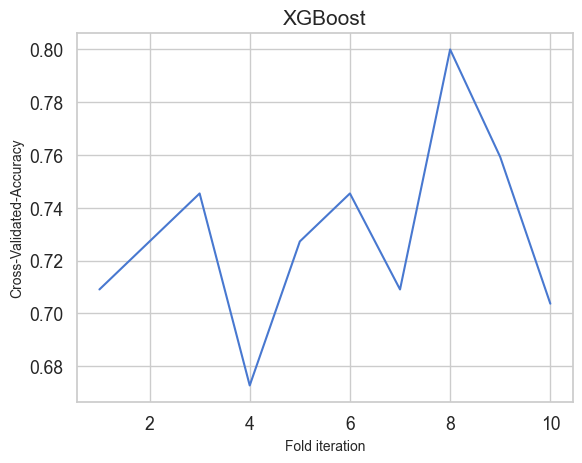

In [62]:
# set the seaborn style
sns.set_style("whitegrid")
# Color palette
blue, = sns.color_palette("muted", 1)

plt.plot(k_range, scores_XGB, color=blue)
sns.set_style("whitegrid")
plt.xlabel('Fold iteration',fontdict={'fontsize':10})
plt.ylabel('Cross-Validated-Accuracy',fontdict={'fontsize':10})
plt.title('XGBoost',fontdict={'fontsize':15})

In [63]:
# Create an instance of Pipeline

pipeline = make_pipeline(StandardScaler(), LogisticRegression().fit(x_train, y_train))

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores_LR = []
k_range = list(range(1, 11))

for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(x_train.iloc[test, :], y_train.iloc[test])
    scores_LR.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores_LR), np.std(scores_LR)))

Fold:  1, Training/Test Split Distribution: [333 160], Accuracy: 0.818
Fold:  2, Training/Test Split Distribution: [333 160], Accuracy: 0.764
Fold:  3, Training/Test Split Distribution: [333 160], Accuracy: 0.800
Fold:  4, Training/Test Split Distribution: [333 160], Accuracy: 0.782
Fold:  5, Training/Test Split Distribution: [333 160], Accuracy: 0.727
Fold:  6, Training/Test Split Distribution: [333 160], Accuracy: 0.727
Fold:  7, Training/Test Split Distribution: [333 160], Accuracy: 0.709
Fold:  8, Training/Test Split Distribution: [333 160], Accuracy: 0.836
Fold:  9, Training/Test Split Distribution: [333 161], Accuracy: 0.907
Fold: 10, Training/Test Split Distribution: [333 161], Accuracy: 0.815


Cross-Validation accuracy: 0.789 +/- 0.057


Text(0.5, 1.0, 'Logistic Regression')

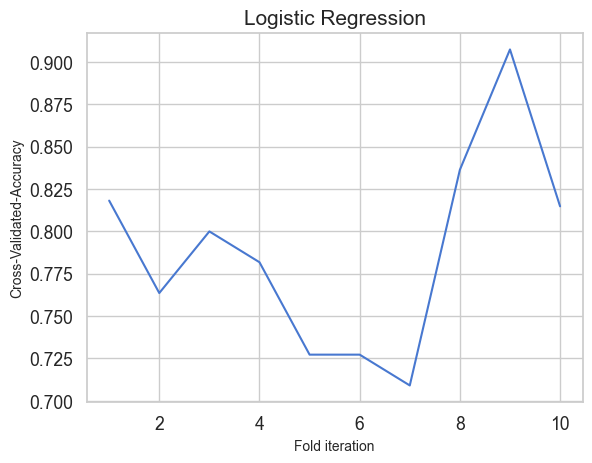

In [64]:
# set the seaborn style
sns.axes_style("white")
# Color palette
blue, = sns.color_palette("muted", 1)

plt.plot(k_range, scores_LR, color=blue)
sns.set_style("whitegrid")
plt.xlabel('Fold iteration',fontdict={'fontsize':10})
plt.ylabel('Cross-Validated-Accuracy',fontdict={'fontsize':10})
plt.title('Logistic Regression',fontdict={'fontsize':15})

In [65]:
scores_DT = pd.Series(scores_DT)
scores_XGB = pd.Series(scores_XGB)
scores_LR = pd.Series(scores_LR)

frame = { 'Decision Tree': scores_DT, 'XGBoost': scores_XGB, 'Logistic Regression': scores_LR }
result = pd.DataFrame(frame)
#Printing elements of Dataframe
print(result)

   Decision Tree  XGBoost  Logistic Regression
0           0.75     0.71                 0.82
1           0.75     0.73                 0.76
2           0.69     0.75                 0.80
3           0.76     0.67                 0.78
4           0.67     0.73                 0.73
5           0.76     0.75                 0.73
6           0.65     0.71                 0.71
7           0.76     0.80                 0.84
8           0.70     0.76                 0.91
9           0.65     0.70                 0.81


<AxesSubplot: >

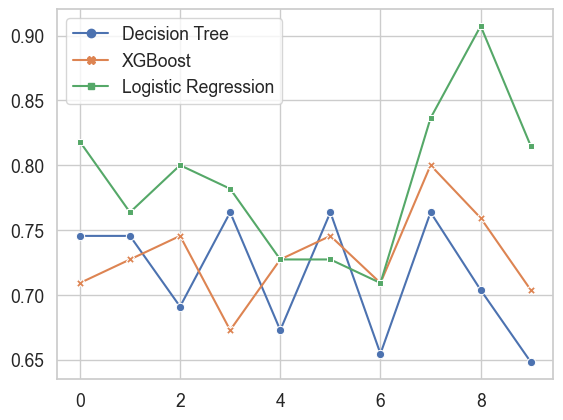

In [66]:
sns.set_style("whitegrid")
sns.lineplot(
    data=result, 
    markers=True, dashes=False
)

___

# Key Takeaways

- Predicting diabetes using machine learning could involve using patient data such as medical history, age, gender, body mass index (BMI), and other relevant factors to train a model to predict the likelihood of an individual developing diabetes. This model could then be used to identify individuals at high risk for the condition and provide them with appropriate preventative care or treatment.


- it is important to note that no model is perfect and there may still be some errors or inaccuracies in the predictions made by the model. It is important to evaluate the model carefully and validate its performance before using it in a real-world setting.


-  **Decision Tree & XGBoost** Achieving 100% accuracy on the training data is not necessarily a bad thing, but it can be an indication that the model may be overfitting. Overfitting occurs when a model is too complex and has learned the specific details of the training data too well, causing it to perform poorly on new, unseen data.


- Overall, achieving 100% accuracy on the training data is not necessarily a bad thing, but it's important to consider the potential for overfitting and to evaluate the model's performance on new data as well.


- **Logistic Regression** machine learning model has an accuracy of 78%, it means that in ~8 out of 10 cases, the model's predictions will be correct. This is generally considered to be a good level of accuracy, but it is not perfect. There may still be some errors or inaccuracies in the predictions made by the model. It is important to evaluate the model carefully and validate its performance before using it in a real-world setting. Additionally, it is important to consider other factors such as the sensitivity and specificity of the model, as well as the potential impact of false positive and false negative predictions on patients.


- **Keep experimenting and trying new things to see what works best.**

___

# Next Development 🚀

- Balancing Data
- Using ANN Algoritm and apply frameworks such as Keras & TensorFlow 